In [1]:
# import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [2]:
# importing data 

loan = pd.read_csv(r"C:\Users\LENOVO\Desktop\All-folder\AlgoraProject\Final\Loan_default.csv")

## Features Engineering 

In [3]:
# defining Feature and Target 

X = loan.drop(['LoanID', 'Default'], axis = 1)
y = loan['Default'].values

## Encoding Categorical value

In [4]:
# Encode binary columns in X

binary_col = ['HasMortgage', 'HasDependents', 'HasCoSigner']

for col in binary_col:
    X[col] = X[col].map({'Yes': 1, 'No': 0})

In [5]:
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,1,1,Other,1
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,0,0,Other,1
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,1,1,Auto,0
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,0,0,Business,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,0,1,Auto,0


In [6]:
# Encoding Categorical columns 

X_object = X.select_dtypes(include = 'object')
X_numeric = X.select_dtypes(exclude = 'object')

# Encoding the cat col.

Cat_col = pd.get_dummies(X_object,  drop_first = True)

# concatinating both the numeric and Cat_col data set

X = pd.concat([X_numeric, Cat_col], axis = 1)


In [7]:
X.shape

(255347, 24)

In [10]:
Cat_col1 = pd.get_dummies(X_object,)

In [11]:
Cat_col2 = pd.get_dummies(X_object,  drop_first = True)

In [13]:
Cat_col1.columns

Index(['Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Auto', 'LoanPurpose_Business',
       'LoanPurpose_Education', 'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

In [14]:
Cat_col2.columns

Index(['Education_High School', 'Education_Master's', 'Education_PhD',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'LoanPurpose_Business', 'LoanPurpose_Education',
       'LoanPurpose_Home', 'LoanPurpose_Other'],
      dtype='object')

## Data Splitiing (Train and Test)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#  Handling imblance 

In [40]:
pd.DataFrame(ytrain).value_counts()

0    41458
1    41458
dtype: int64

In [38]:
# Under Sampling 

rus = RandomUnderSampler(sampling_strategy = 0.50, random_state = 42)

# Fitting  and creating resmapled X  and y

X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [39]:
# over Sample

smote = SMOTE(sampling_strategy = 'auto', random_state= 42 )

# Fitting  and creating resmapled X  and y

Xtrain, ytrain = smote.fit_resample(X_train_resampled, y_train_resampled)

# Scaling

In [41]:
#creating scaler instance

ms = MinMaxScaler()

## fiting and transsforming the dataset

X_train = ms.fit_transform(Xtrain)
X_test = ms.transform(X_test)
y_train = ytrain.copy()

## Building Model 

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [44]:
# creating call back parameters 

ES = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 25, verbose = 1)

In [46]:
# Creating the model instance and the model

model = Sequential()

# building the model layers

model.add(Dense(24, activation = 'relu'))
model.add(Dropout(0.2))


#Binary Classficiation

model.add(Dense(1, activation = 'sigmoid'))

# model compliation

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [47]:
# traing the model 

model.fit( x= X_train, y = y_train, epochs = 100, batch_size = 50, validation_data = (X_test, y_test), callbacks = [ES])

Epoch 1/100

1659/1659 [==============================] - 23s 11ms/step - loss: 0.5352 - val_loss: 0.5069
Epoch 2/100
1659/1659 [==============================] - 22s 13ms/step - loss: 0.4907 - val_loss: 0.4959
Epoch 3/100
1659/1659 [==============================] - 19s 11ms/step - loss: 0.4809 - val_loss: 0.4862
Epoch 4/100
1659/1659 [==============================] - 16s 10ms/step - loss: 0.4767 - val_loss: 0.4775
Epoch 5/100
1659/1659 [==============================] - 17s 10ms/step - loss: 0.4738 - val_loss: 0.5051
Epoch 6/100
1659/1659 [==============================] - 24s 14ms/step - loss: 0.4719 - val_loss: 0.4925
Epoch 7/100
1659/1659 [==============================] - 27s 16ms/step - loss: 0.4709 - val_loss: 0.4959
Epoch 8/100
1659/1659 [==============================] - 26s 16ms/step - loss: 0.4695 - val_loss: 0.4749
Epoch 9/100
1659/1659 [==============================] - 22s 13ms/step - loss: 0.4704 - val_loss: 0.4771
Epoch 10/100
1659/1659 [==============================

In [48]:
# visualising the loss 

loss = pd.DataFrame(model.history.history)

<Axes: >

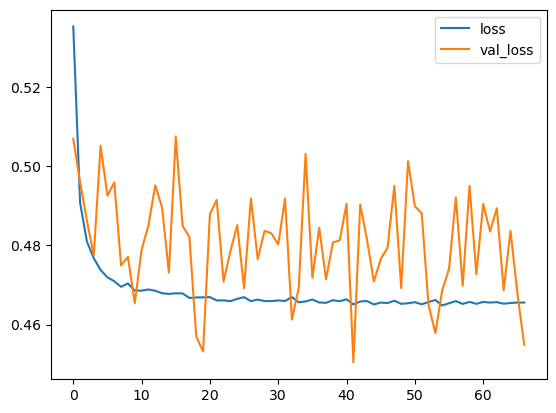

In [49]:
# visualising the loss 

loss.plot()

In [52]:
prediction = model.predict(X_test)
y_pred = []
for i in prediction:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

print(classification_report(y_test, y_pred))

2394/2394 [==============================] - 13s 6ms/step
              precision    recall  f1-score   support

           0       0.92      0.85      0.89     67681
           1       0.29      0.44      0.35      8924

    accuracy                           0.81     76605
   macro avg       0.60      0.65      0.62     76605
weighted avg       0.85      0.81      0.82     76605



## Model 1

only under sample

In [53]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [54]:
# Under Sampling 

rus = RandomUnderSampler(sampling_strategy = 0.50, random_state = 42)

# Fitting  and creating resmapled X  and y

X_train_resampled, y_train_resampled = rus.fit_resample(Xtrain, ytrain)

In [60]:
Xtrain = ms.fit_transform(X_train_resampled)
Xtest = ms.transform(Xtest)
ytrain = y_train_resampled.copy()

c:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [68]:
# Creating the model instance and the model

model1 = Sequential()

# building the model layers

model1.add(Dense(24, activation = 'relu'))
#model1.add(Dropout(0.2))


#Binary Classficiation

model1.add(Dense(1, activation = 'sigmoid'))

# model compliation

model1.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [73]:
# traing the model 

model1.fit( x= Xtrain, y = ytrain, epochs = 100, validation_data = (Xtest, ytest), callbacks = [ES])

Epoch 1/100
1944/1944 [==============================] - 26s 13ms/step - loss: 0.5386 - val_loss: 1.3530
Epoch 2/100
1944/1944 [==============================] - 24s 12ms/step - loss: 0.5385 - val_loss: 1.1831
Epoch 3/100
1944/1944 [==============================] - 25s 13ms/step - loss: 0.5382 - val_loss: 1.2707
Epoch 4/100
1944/1944 [==============================] - 24s 12ms/step - loss: 0.5383 - val_loss: 1.2521
Epoch 5/100
1944/1944 [==============================] - 24s 12ms/step - loss: 0.5382 - val_loss: 1.1985
Epoch 6/100
1944/1944 [==============================] - 26s 13ms/step - loss: 0.5379 - val_loss: 1.2139
Epoch 7/100
1944/1944 [==============================] - 26s 13ms/step - loss: 0.5381 - val_loss: 1.2043
Epoch 8/100
1944/1944 [==============================] - 25s 13ms/step - loss: 0.5379 - val_loss: 1.1988
Epoch 9/100
1944/1944 [==============================] - 28s 14ms/step - loss: 0.5378 - val_loss: 1.2633
Epoch 10/100
1944/1944 [==============================]

In [74]:
# visualising the loss 

loss1 = pd.DataFrame(model1.history.history)

<Axes: >

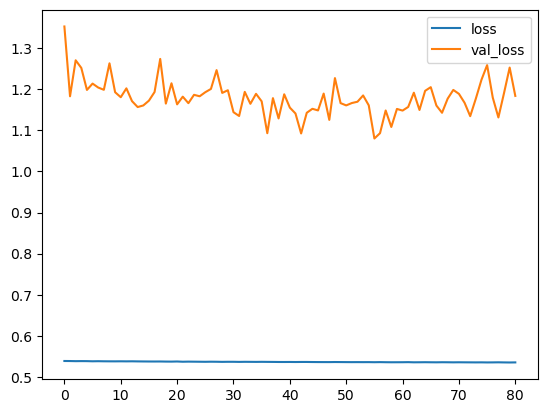

In [75]:
# visualising the loss 

loss1.plot()

In [76]:
prediction1 = model1.predict(Xtest)
y_pred1 = []
for i in prediction1:
    if i > 0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)

print(classification_report(ytest, y_pred1))

2394/2394 [==============================] - 15s 6ms/step
              precision    recall  f1-score   support

           0       0.92      0.05      0.09     67681
           1       0.12      0.97      0.21      8924

    accuracy                           0.15     76605
   macro avg       0.52      0.51      0.15     76605
weighted avg       0.83      0.15      0.10     76605



## Model2 

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [90]:
X_train = ms.fit_transform(X_train)
X_test = ms.transform(X_test)

In [91]:
# Creating the model instance and the model

model2 = Sequential()

# building the model layers

model2.add(Dense(24, activation = 'relu'))
model2.add(Dropout(0.2))

# Binary Classficiation

model2.add(Dense(1, activation = 'sigmoid'))

# model compliation

model2.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [92]:
model2.fit( x= X_train, y = y_train, epochs = 100, validation_data = (X_test, y_test), callbacks = [ES])

Epoch 1/100
6384/6384 [==============================] - 61s 9ms/step - loss: 0.3288 - val_loss: 0.3142
Epoch 2/100
6384/6384 [==============================] - 57s 9ms/step - loss: 0.3199 - val_loss: 0.3123
Epoch 3/100
6384/6384 [==============================] - 55s 9ms/step - loss: 0.3179 - val_loss: 0.3112
Epoch 4/100
6384/6384 [==============================] - 54s 8ms/step - loss: 0.3164 - val_loss: 0.3105
Epoch 5/100
6384/6384 [==============================] - 54s 8ms/step - loss: 0.3159 - val_loss: 0.3100
Epoch 6/100
6384/6384 [==============================] - 51s 8ms/step - loss: 0.3156 - val_loss: 0.3106
Epoch 7/100
6384/6384 [==============================] - 54s 9ms/step - loss: 0.3158 - val_loss: 0.3108
Epoch 8/100
6384/6384 [==============================] - 67s 10ms/step - loss: 0.3154 - val_loss: 0.3098
Epoch 9/100
6384/6384 [==============================] - 49s 8ms/step - loss: 0.3153 - val_loss: 0.3109
Epoch 10/100
6384/6384 [==============================] - 49s 8

In [93]:
# visualising the loss 

loss2 = pd.DataFrame(model2.history.history)

<Axes: >

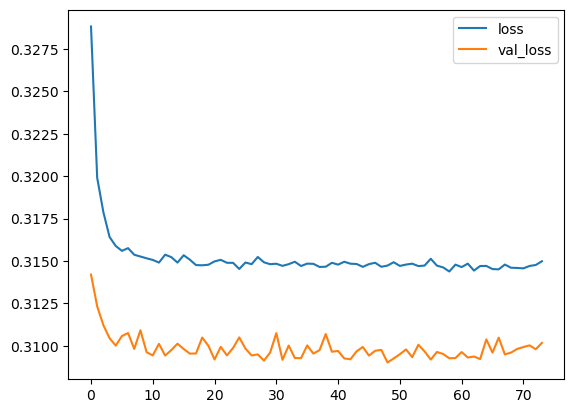

In [94]:
# visualising the loss 

loss2.plot()

In [95]:
prediction2 = model2.predict(X_test)
y_pred2 = []
for i in prediction2:
    if i > 0.5:
        y_pred2.append(1)
    else:
        y_pred2.append(0)

print(classification_report(y_test, y_pred2))

1596/1596 [==============================] - 9s 6ms/step
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.61      0.07      0.13      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.53      0.54     51070
weighted avg       0.86      0.89      0.85     51070



In [88]:
X_train.shape

(82916, 24)

## Model3

In [97]:
# Creating the model instance and the model

model3 = Sequential()

# building the model layers

model3.add(Dense(24, activation = 'relu'))
model3.add(Dropout(0.2))

model3.add(Dense(12, activation = 'relu'))
model3.add(Dropout(0.2))

# Binary Classficiation

model3.add(Dense(1, activation = 'sigmoid'))

# model compliation

model3.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [98]:
model3.fit( x= X_train, y = y_train, epochs = 100, batch_size = 200,  validation_data = (X_test, y_test), callbacks = [ES])

Epoch 1/100
1022/1022 [==============================] - 15s 11ms/step - loss: 0.3662 - val_loss: 0.3165
Epoch 2/100
1022/1022 [==============================] - 11s 11ms/step - loss: 0.3318 - val_loss: 0.3145
Epoch 3/100
1022/1022 [==============================] - 11s 11ms/step - loss: 0.3265 - val_loss: 0.3136
Epoch 4/100
1022/1022 [==============================] - 11s 10ms/step - loss: 0.3236 - val_loss: 0.3124
Epoch 5/100
1022/1022 [==============================] - 10s 10ms/step - loss: 0.3215 - val_loss: 0.3119
Epoch 6/100
1022/1022 [==============================] - 10s 9ms/step - loss: 0.3203 - val_loss: 0.3112
Epoch 7/100
1022/1022 [==============================] - 10s 10ms/step - loss: 0.3194 - val_loss: 0.3119
Epoch 8/100
1022/1022 [==============================] - 10s 9ms/step - loss: 0.3187 - val_loss: 0.3106
Epoch 9/100
1022/1022 [==============================] - 10s 10ms/step - loss: 0.3185 - val_loss: 0.3105
Epoch 10/100
1022/1022 [==============================] -

In [101]:
# visualising the loss 

loss3 = pd.DataFrame(model3.history.history)

<Axes: >

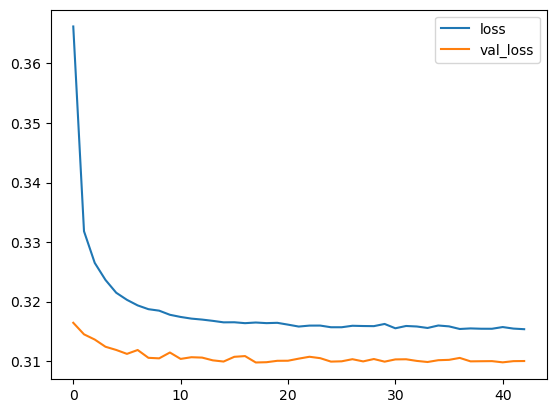

In [102]:
# visualising the loss 

loss3.plot()

In [103]:
prediction3 = model2.predict(X_test)
y_pred3 = []
for i in prediction2:
    if i > 0.5:
        y_pred3.append(1)
    else:
        y_pred3.append(0)

print(classification_report(y_test, y_pred2))

1596/1596 [==============================] - 10s 6ms/step
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     45170
           1       0.61      0.07      0.13      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.53      0.54     51070
weighted avg       0.86      0.89      0.85     51070



In [96]:
from joblib import dump

dump(model2, 'loanmodel2.joblib')

['loanmodel2.joblib']

In [112]:
loan.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')